<a href="https://colab.research.google.com/github/Waldir0607/Analyze-and-predict-sales/blob/main/Analytic_and_predict_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto de análisis de ventas para productos alimenticios** 📊


## **Introducción**
En un mercado altamente competitivo, comprender los factores que impulsan las ventas es crucial para la toma de decisiones estratégicas.
# ¿Cuál será mi objetivo? 🎯
 Este proyecto tiene como objetivo analizar las ventas de productos alimenticios en diversas tiendas, con el objetivo de ayudar a optimizar la gestión de inventarios y mejorar la estrategia comercial través del análisis de datos.

*** En concreto:***

1.- Ayudar al minorista a comprender las propiedades de los productos.

2.- Puntos de venta que juegan un papel crucial en el aumento de las ventas.

# **¡Comenzamos!** 🚀

Primero importaremos las siguientes **librerías** que nos servirán:


*   **pandas:** Manejo y análisis de datos estructurados en DataFrames.
*   **numpy:** Operaciones matemáticas y manejo de arrays multidimensionales.


*  **matplotlib:** Creación de gráficos y visualizaciones básicas.
*  **seaborn:** Visualización de datos estadísticos con gráficos atractivos


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **¡Bien!** 🟢
Comenzaremos el análisis exploratorio 📊 usando el método **info()** para obtener un resumen consiso como:


*   **Estructura** de los datos.
*   Número de **entradas**(registros).

*   El **número** de columnas.
*   El **tipo de datos** de cada columna.

*   Cuántos **valores nulos** hay en cada una.








In [3]:
df = pd.read_csv('/content/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Ahora**
Utilizamos un **head()** para:

*  Ver las **primeras 5** filas del DataFrame por defecto.

*  Obtener una **visualización rápida** de los datos.
*  Observar como se **presentan** los datos y a detectar posibles **inconsistencias o errores de entrada.**




In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Buscamos:** 🔍
 Duplicados para si en caso encontrarlos, eliminarlos de nuestro Dataframe, ya que estos **sesgan** el análisis.

In [5]:
df.duplicated().sum()

0

También **cantidad exacta** de valores nulos que hay por columna.

In [6]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Seguido de el **porcentaje** que implican estos con respecto a su total para así tener una mejor idea de como tratarlos.

In [7]:
df.isna().sum() / len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


***Observaciones:***  

*   La columna "*Item_Weight* " tiene un 17% de valores faltantes respecto a su total.
*   La columna "*Outlet_Size* " tiene un 28% de valores faltantes respecto a su total.













# **¡Siguiente!** ➡️

Usaremos un **describe()** en *Item_Weight* con el fin de descubrir rápidamente las estadísticas clave de sus datos, como media, desviación estándar y más.

In [8]:
df['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


Nos apoyaremos de una visualización 📈 en este caso un **histograma** para tener una mejor idea de la distribución de los datos para decidir la mejor manera de tratarlos.

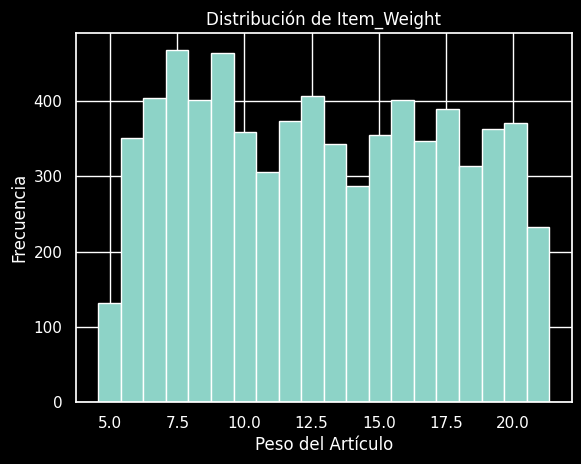

In [9]:
df['Item_Weight'].hist(bins=20)
plt.title('Distribución de Item_Weight')
plt.xlabel('Peso del Artículo')
plt.ylabel('Frecuencia')
plt.show()

**Observaciones:**


*   La distribución de **Item_Weight** parece estar relativamente uniforme con algunos picos en ciertos rangos, lo que sugiere que no está muy sesgada.
*   Tampoco se observan outliers o un pico fuerte de un solo valor.



**Por ese motivo:**

Imputaré los valores nulos con la **media**




In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

*Verificamos* que ya no aparezcan valores nulos en *Item_Weight*.

In [11]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Ahora trataremos **Outlet_Size** así que usaremos el método *value_counts()* y nuevamente *describe()*

In [12]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [13]:
df['Outlet_Size'].describe()

,Outlet_Size
count,6113
unique,3
top,Medium
freq,2793


En este **caso** al ser una variable **categórica** con tres valores únicos (small, medium, high) donde el valor más común es medium.

Imputaré los valores nulos con la **moda**.

In [14]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

Verificamos que se hayan imputado correctamente **Outlet_Size**

In [15]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Ahora** realizamos visualizaciones para encontrar valores outliers en las columnas numéricas.

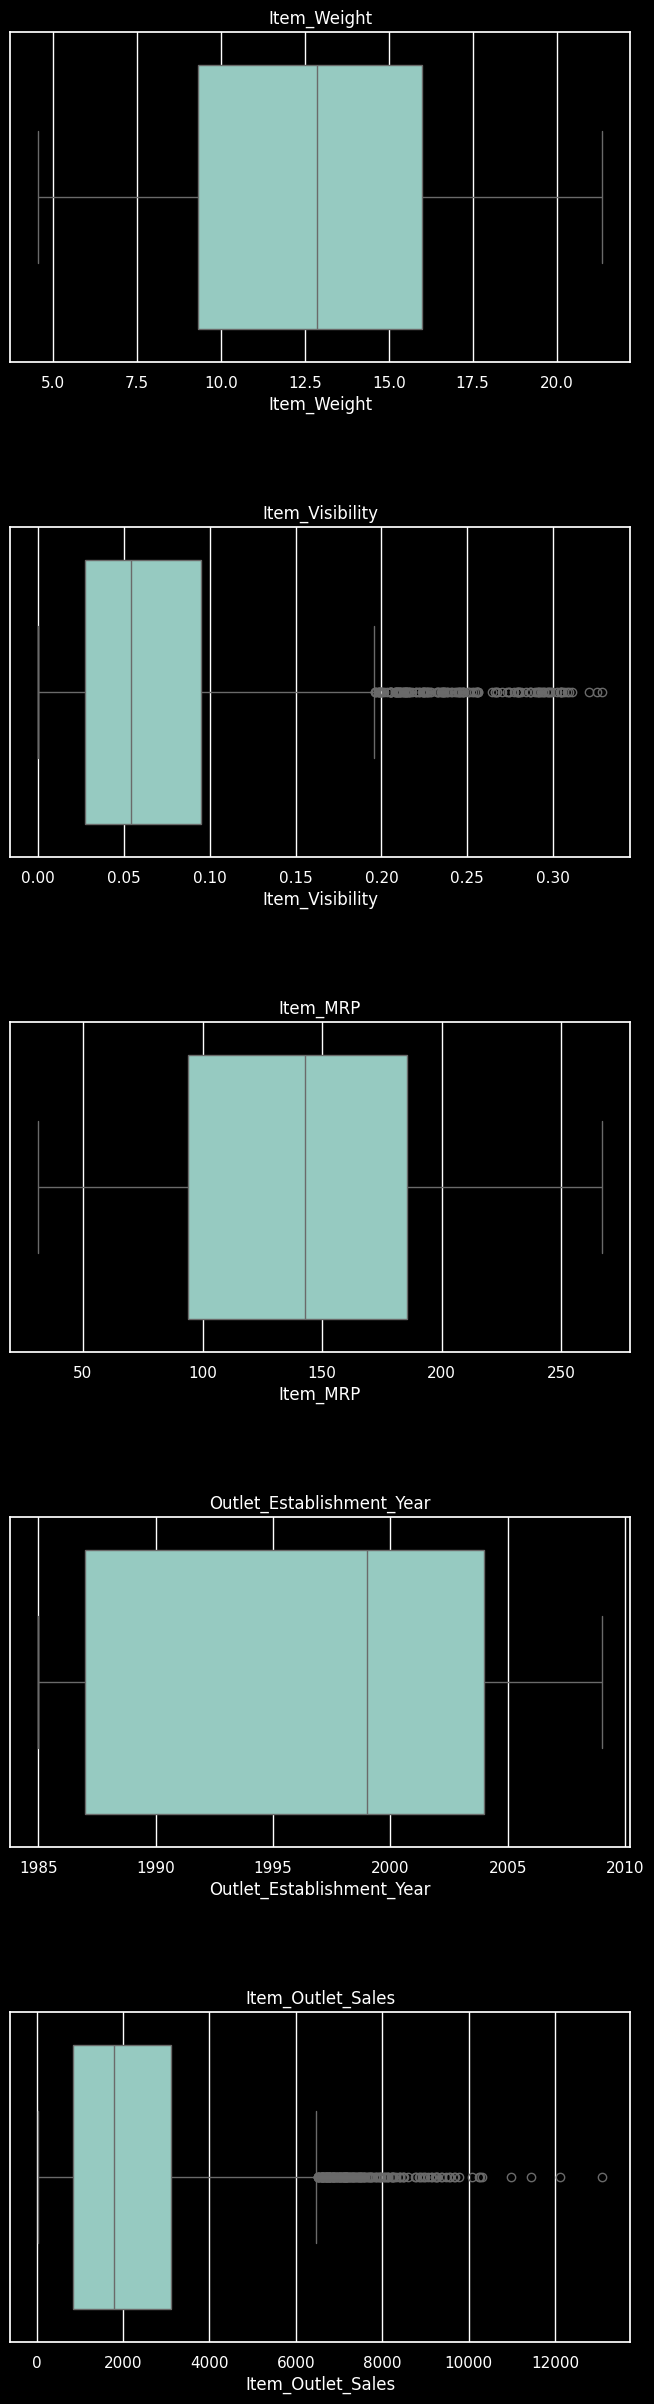

In [16]:
colmns_rn = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(colmns_rn):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)

# **¡Seguimos!**
Buscaremos la cantidad de valores únicos que tienen nuestras columnas categóricas con el fin de hayar algún indicio de entradas repetidas.

In [17]:
colmns_r = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in colmns_r:
     print(f'Columna {col}: {df[col].nunique()} valores')

Columna Item_Fat_Content: 5 valores
Columna Item_Type: 16 valores
Columna Outlet_Identifier: 10 valores
Columna Outlet_Size: 3 valores
Columna Outlet_Location_Type: 3 valores
Columna Outlet_Type: 4 valores


**!Ahora nos apoyaremos de visualizaciones**!

<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-18-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_x

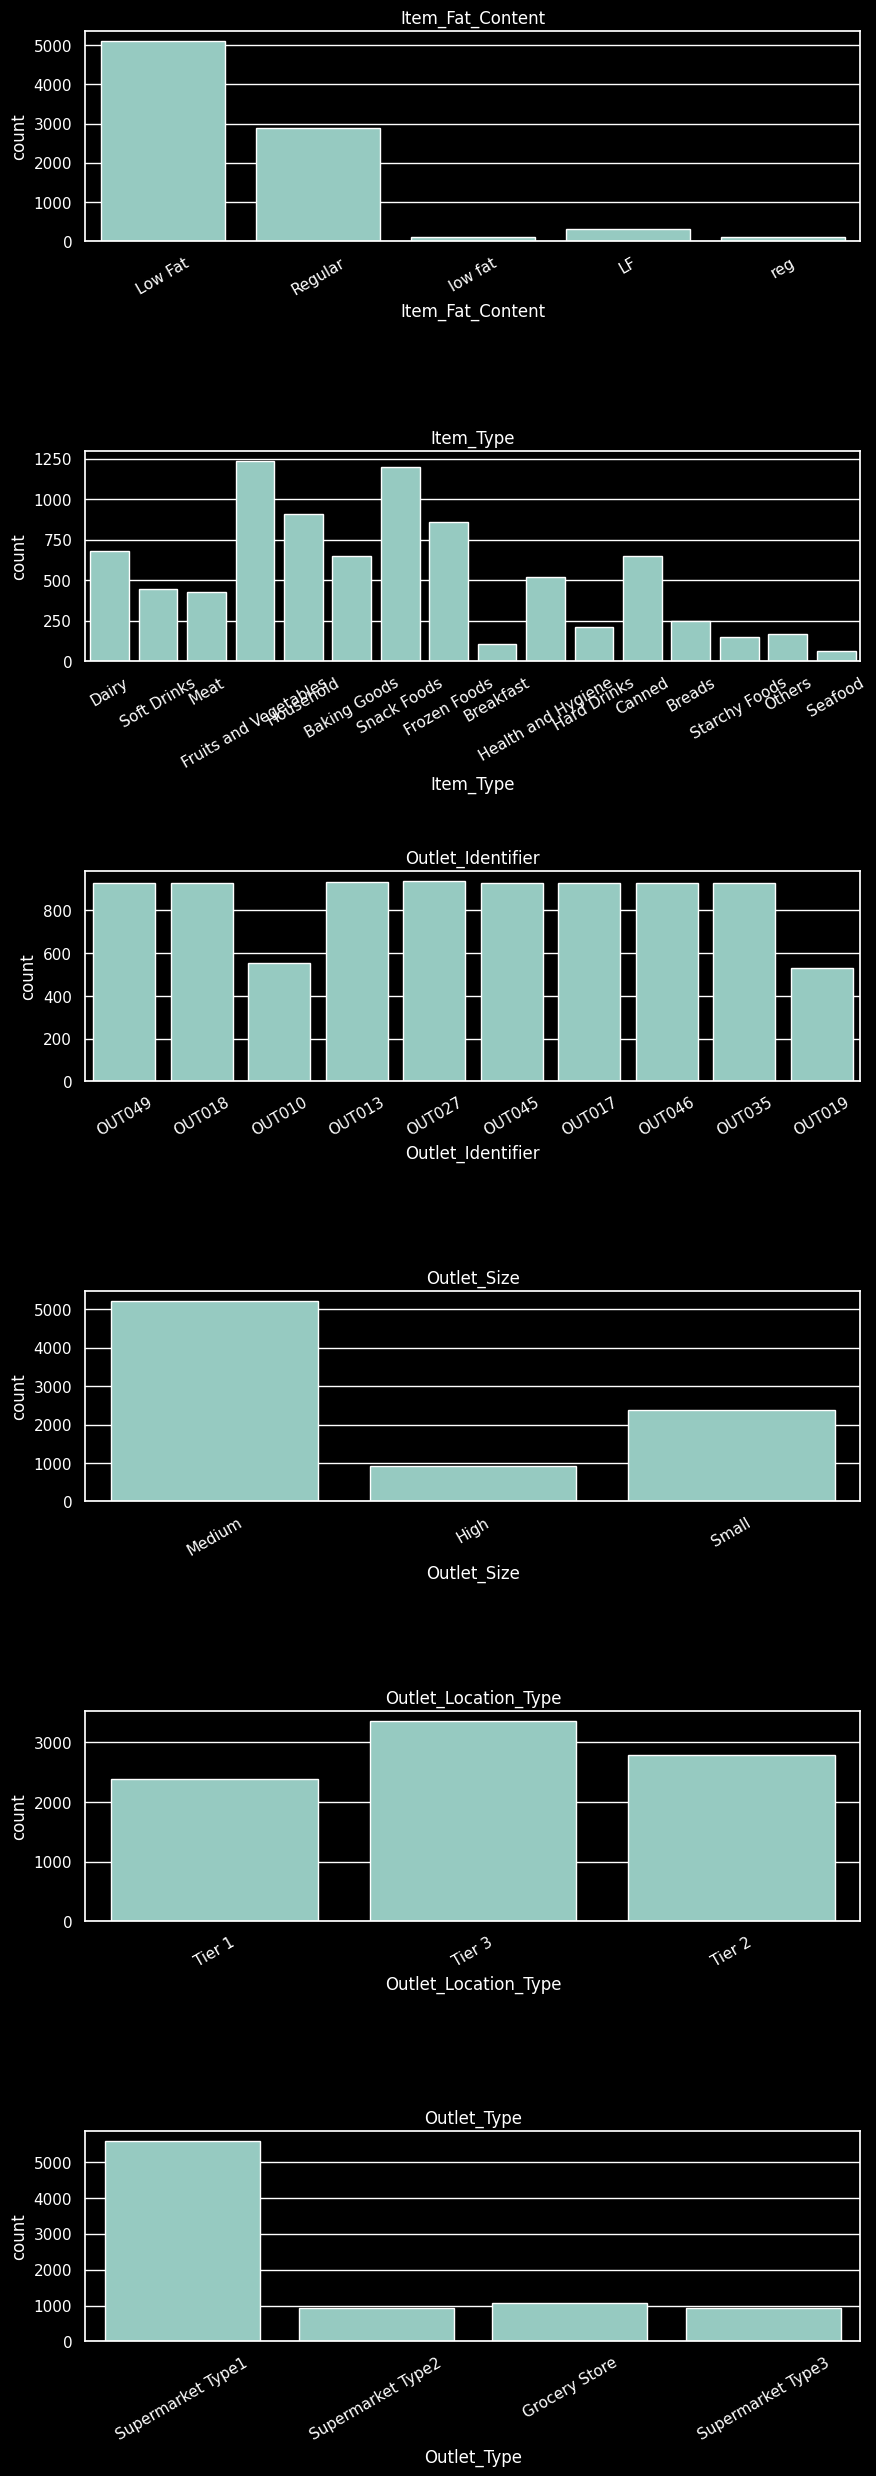

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(colmns_r):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

# **Observaciones:** 📝

*   **Item_Fat_Content** tiene errores de entrada.



Pasaré los datos de nuestras variables categóricas **a minúsculas** con el fin de corregirlas, asi mismo verificaré el cambio mediante visualizaciones.

<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-f75b73ea4769>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_x

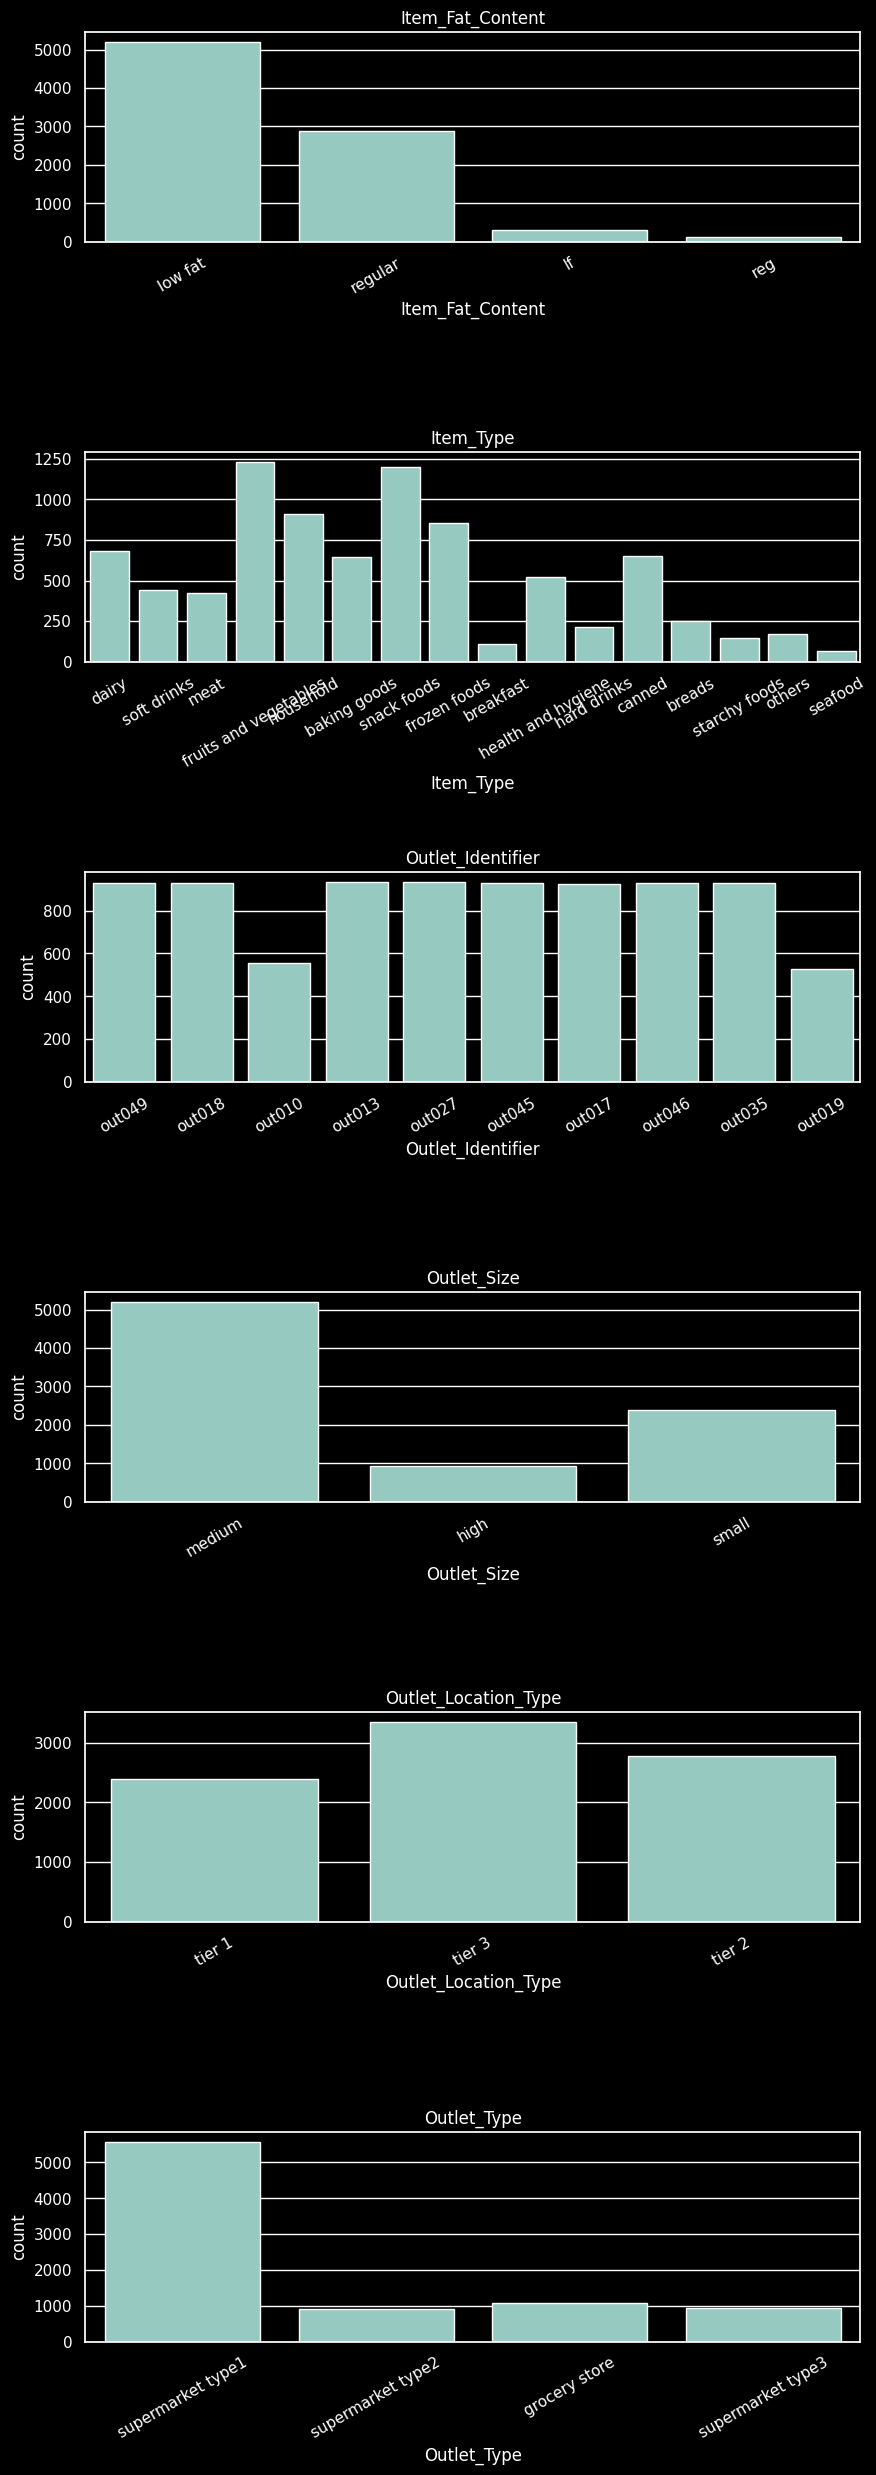

In [19]:
for column in df.columns:
  if column in colmns_r:
    df[column] = df[column].str.lower()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(colmns_r):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observación:**


*   La gráfcas muestran que ya pasaron a minúsculas los datos de nuestras variables categóricas.



# **Corregimos:** ✅

Los errores de entrada de **Item_Fat_Content**:

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('lf', 'low fat', regex=False)
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'regular', regex=False)
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('regularular', 'regular', regex=False)

**Verificamos** que se haya aplicado correctamente

<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-3714929ef8e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_x

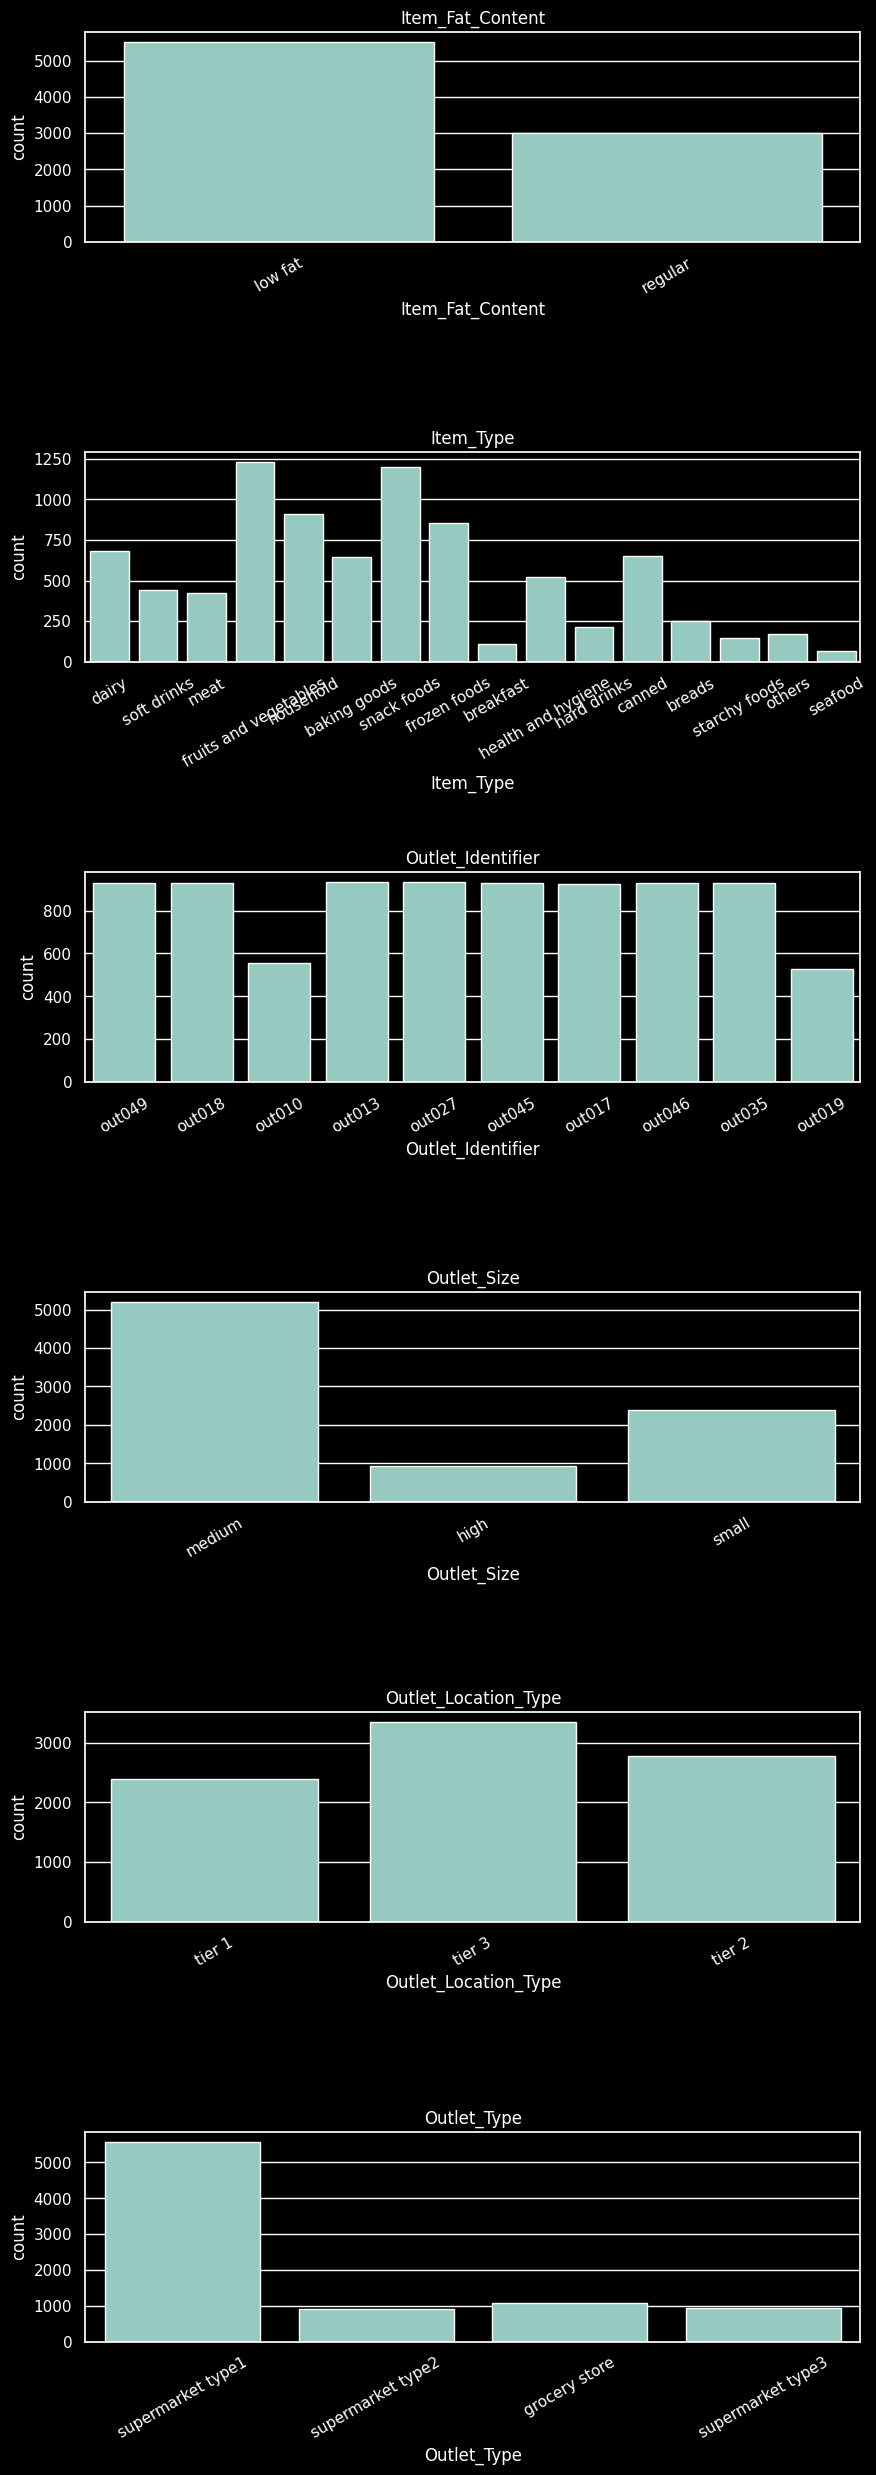

In [21]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(colmns_r):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

# **¡Continuamos con una parte muy importante del análisis exploratorio!** 📊

Generaremos visualizaciones que nos ayuden a obtener la información necesaria (***Insights***) para ayudar a cumplir con los objetvos que son:


*   Ayudar al minorista a comprender las propiedades de los productos.

*   Puntos de venta que juegan un papel crucial en el aumento de las ventas.



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Figure size 1000x600 with 0 Axes>

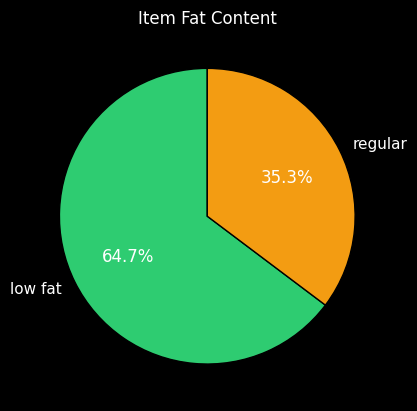

In [23]:
sns.set(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

gender_counts = df['Item_Fat_Content'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
       colors=['#2ECC71', '#F39C12'], wedgeprops={'edgecolor': 'black'})
ax.set_title('Item Fat Content', color='white')
plt.show()

**Observación:** La gráfica nos muestra porcentualmente la cantidad de productos que son bajos en grasa o regular.

*   Se observa un **64.7%** de productos bajos en grasa con respecto al total.
*   Se observa un **35.3%** de productos de regular grasa con respecto al total.



<ipython-input-24-cd277135870c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_item_type.values, y=sales_by_item_type.index, palette='tab10')


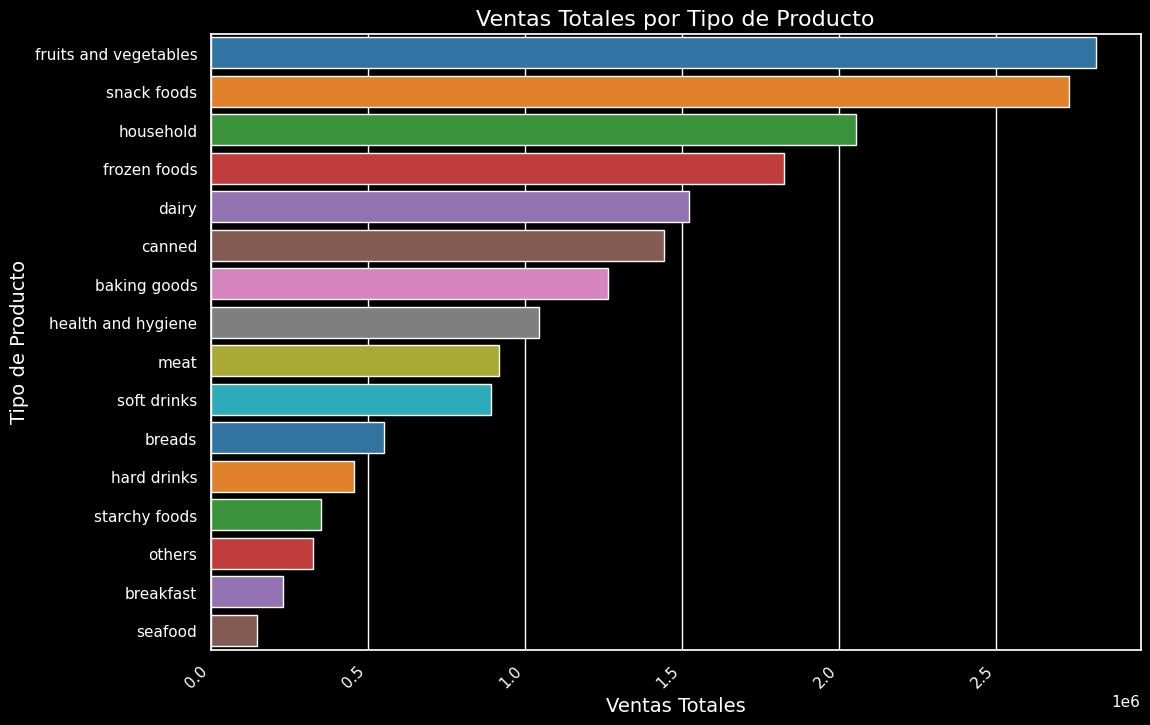

In [24]:
sns.set(style="darkgrid")
plt.style.use('dark_background')

sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

sales_by_item_type = sales_by_item_type.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sales_by_item_type.values, y=sales_by_item_type.index, palette='tab10')
plt.title('Ventas Totales por Tipo de Producto', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Tipo de Producto', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


**Observación:** La gráfica nos muestra las ventas totales por tipo de producto.


*   Se observa que **fruit and vegetables** y **snack foods** son los tipos de productos que más se venden.
*   Se observa que **household** y **frozen foods** son los tipos de productos que tienen rendimiento similar.
*   Se observa que **breakfast** y **seafood** son los tipos de productos que menos se venden.



<ipython-input-25-47d1fbf35871>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_counts.index, y=size_counts.values, palette='tab10', ax=ax)


<Figure size 1000x600 with 0 Axes>

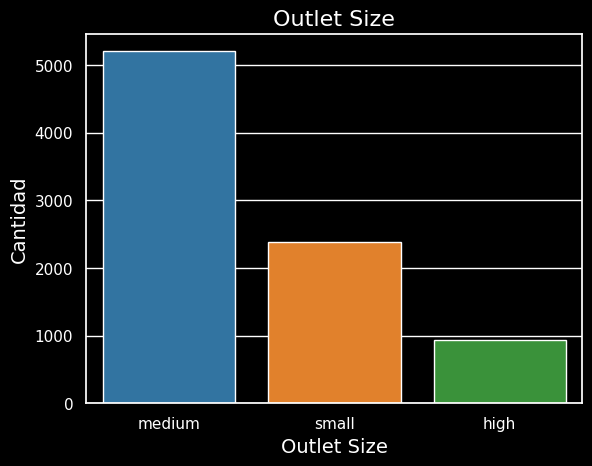

In [25]:
sns.set(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

size_counts = df['Outlet_Size'].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=size_counts.index, y=size_counts.values, palette='tab10', ax=ax)
ax.set_title('Outlet Size', fontsize=16, color='white')
ax.set_xlabel('Outlet Size', fontsize=14, color='white')
ax.set_ylabel('Cantidad', fontsize=14, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()


**Observación:** La gráfica nos muestra la cantidad de tiendas con las que se cuentan según su tamaño.

*   Se observa que hay más cantidad de tiendas de tamaño medio.
*   Se observa que hay más cantidad de tiendas de gran tamaño.



<ipython-input-26-73358db8b95d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_location_type.index, y=sales_by_location_type.values, palette='tab10')


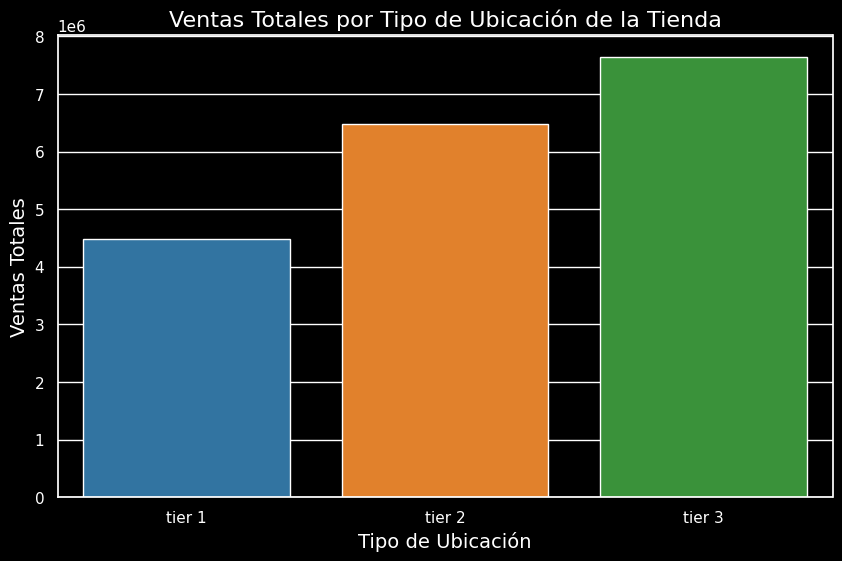

In [26]:
sns.set(style="darkgrid")
plt.style.use('dark_background')

sales_by_location_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.title('Ventas Totales por Tipo de Ubicación de la Tienda', fontsize=16)
plt.xlabel('Tipo de Ubicación', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.show()


**Observación:** La gráfica nos muestra la cantidad de ventas según la zona en la que se encuentra en la tienda.

Entendiendo lo siguiente:

*   Tier 1: Zona con desarrollo alto
*   Tier 2: Zona con desarrollo medio


*   Tier 3: Zona con desarrollo bajo

**Se observa:** Que las tiendas que se encuentran en las zonas con desarrollo bajo son las que tienen un mayor rendimiento con respecto a las ventas, lo contrario con tiendas que se encuentran en zonas de desarrollo alto.



<ipython-input-27-09ded81579ea>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette='Paired')


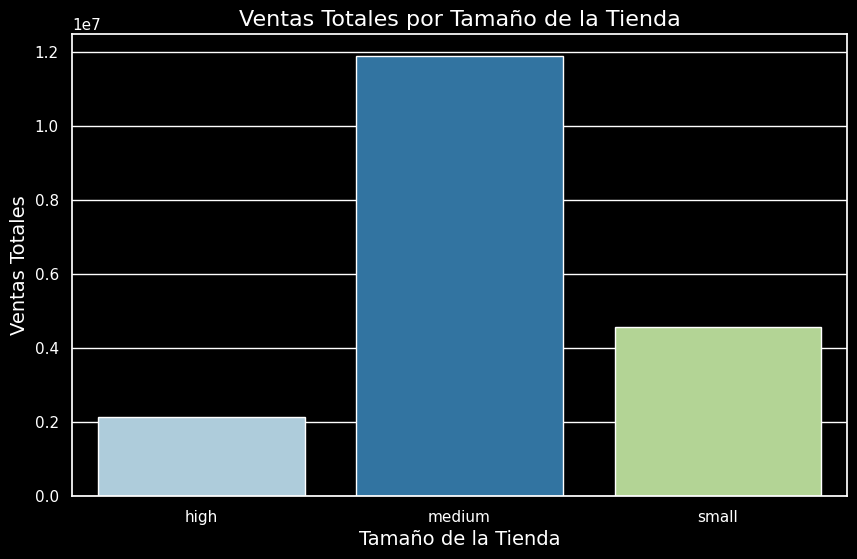

In [27]:
sns.set(style="darkgrid")
plt.style.use('dark_background')

sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette='Paired')
plt.title('Ventas Totales por Tamaño de la Tienda', fontsize=16)
plt.xlabel('Tamaño de la Tienda', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.show()


**Observación:** La gráfica nos muestra las ventas totales por tamaño de tienda.

*  Se observa que las tiendas de tamaño medio, son las que más ventas obtienen.
*  Se observa que las tiendas de mayor tamaño, son aquellas que menos ventas obtienen.


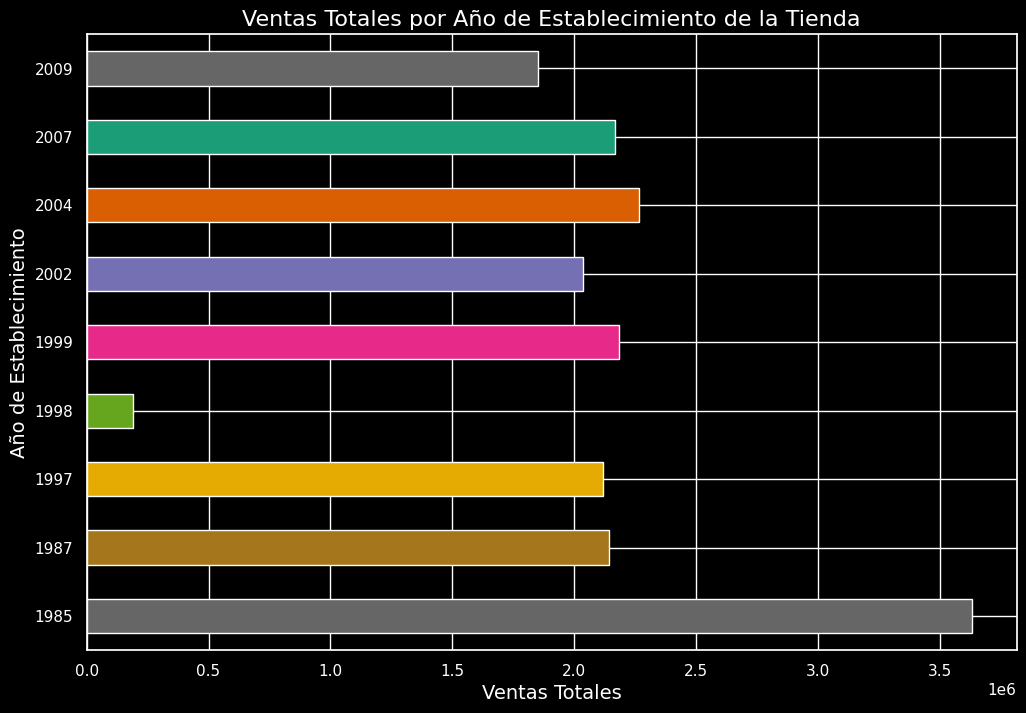

In [28]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()

sales_by_year = sales_by_year.sort_index()

plt.figure(figsize=(12, 8))
sales_by_year.plot(kind='barh', color=plt.cm.Dark2_r.colors)
plt.title('Ventas Totales por Año de Establecimiento de la Tienda', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Año de Establecimiento', fontsize=14)
plt.show()

**Observación:** La gráfica nos muestra la cantidad de ventas por año en que se fundó la tienda.

*   Observando que la tienda que más ventas obtiene es la fundada en 1985.
*   Observando que la tienda que menos ventas obtiene es la fundada en 1998.


<ipython-input-29-a9baebd60267>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values, palette='Dark2')


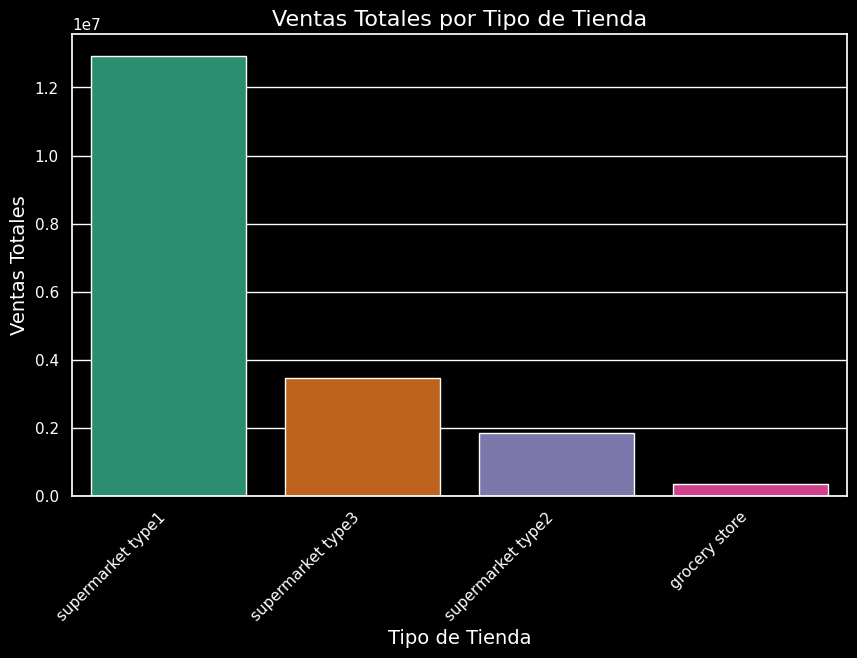

In [29]:
sns.set(style="whitegrid")
plt.style.use('dark_background')

sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

sales_by_outlet_type = sales_by_outlet_type.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values, palette='Dark2')
plt.title('Ventas Totales por Tipo de Tienda', fontsize=16)
plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


**Observación:** La gráfica nos muestra los tipos de supermercados según su rendimiento en ventas.

Entendiendo a:
*   Grocery store: Aquellos que son muy pequeños.

*   Supermarket Type 1: Aquellos que son pequeños o de barrio con una gama menor de productos ofertados.

*   Supermarket Type 2: Aquellos de tamaño intermedio con una gama media de productos ofertados.
*   Supermarket Type 3: Aquellos que son grandes y que ofrecen mayor gama de productos





Se observa: Que los **supermarket type 1** son los que más ventas tienen, por el contrario **grocery store** que son los que menor rendimiento en este campo poseen.



<ipython-input-30-a750b32a2c6b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_outlet.values, y=sales_by_outlet.index, palette='Set2')


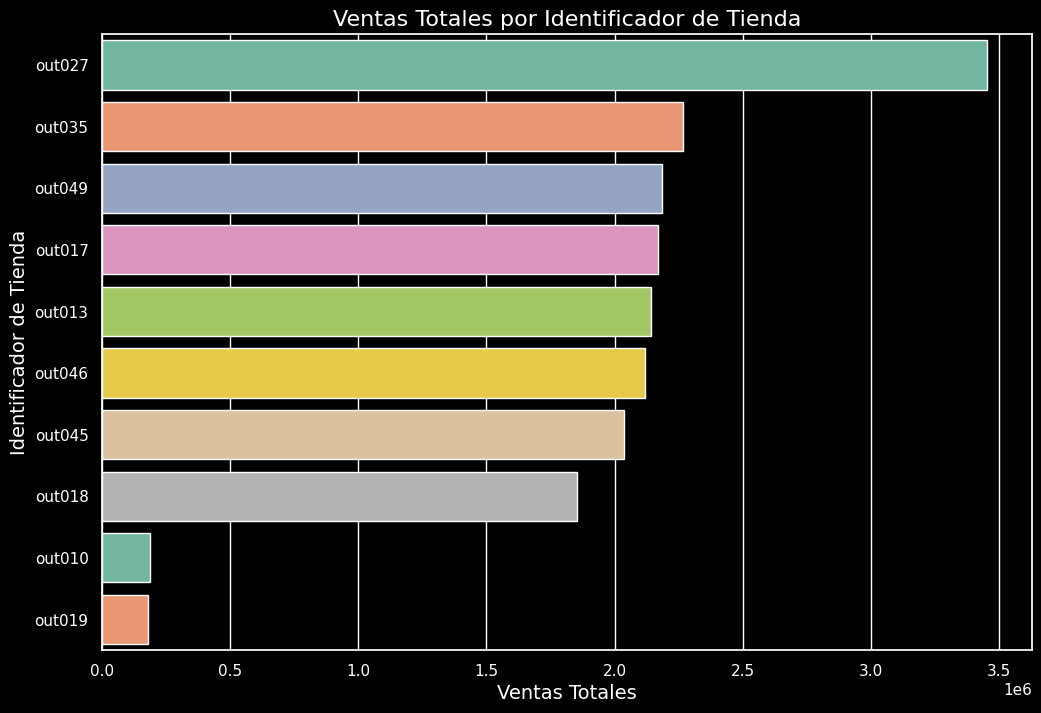

In [30]:
sns.set(style="whitegrid")
plt.style.use('dark_background')

sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

sales_by_outlet = sales_by_outlet.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sales_by_outlet.values, y=sales_by_outlet.index, palette='Set2')
plt.title('Ventas Totales por Identificador de Tienda', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Identificador de Tienda', fontsize=14)
plt.show()


**Observación:** La gráfica nos muestra las ventas totales según el ID específico de la tienda. Con aquello podemos identificar cuales son las tiendas que tienen rendmientos tanto excelentes como los que no contribuyen tanto, esto con respecto a las ventas.

*   Observamos que la tienda **out027** es la que más ventas tiene.

*   Observamos que las tiendas **out035, out049, out017, out013 y out046** tienen un rendimiento en ventas similar.  

*   Observamos que las tiendas **out010** y **out019** son las que menos ventas tienen.







# **¡Importante!** 🔴

Ya que uno de nuestros objetivos es ofrecer información sobre los puntos de venta que juegan un papel crucial en el aumento de las ventas, dado que tenemos ciertas observaciones con **Outlet_Identifier** y **Outlet_Establishment_Year** en análisis previos, los agruparemos para obtener información más precisa aún.

<ipython-input-31-b01854fd48f7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_outlet_year['Item_Outlet_Sales'],


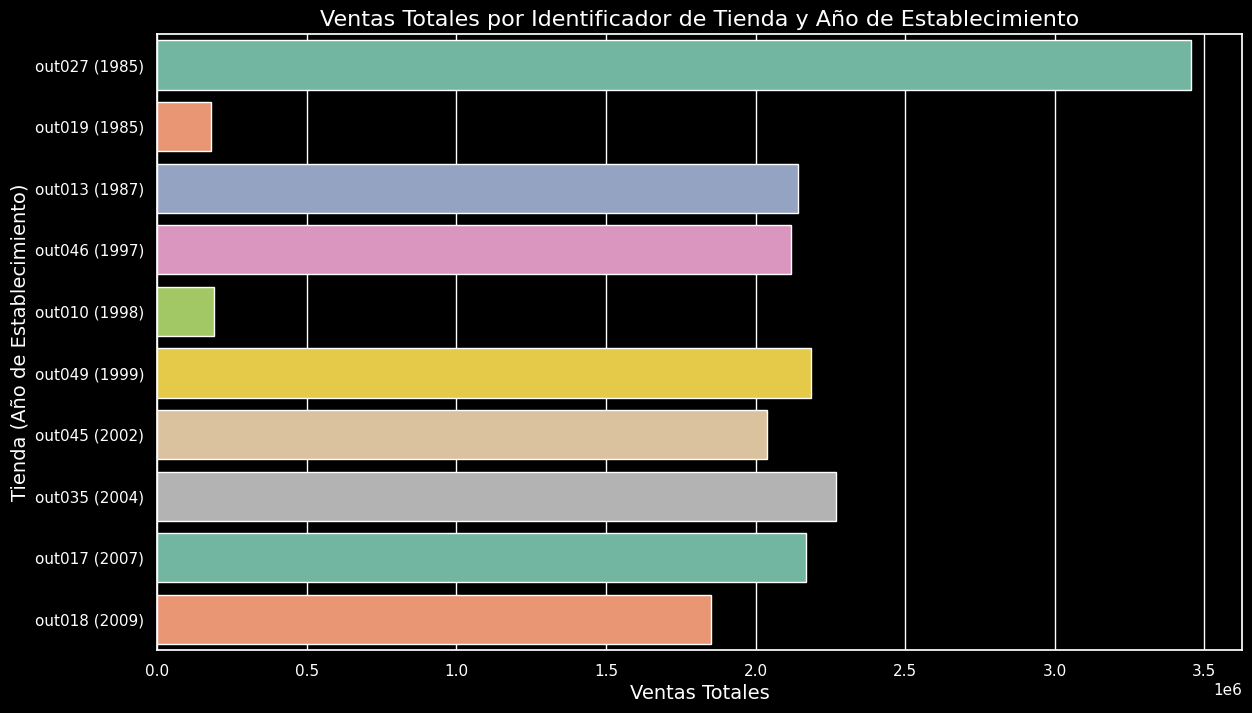

In [31]:
sns.set(style="whitegrid")
plt.style.use('dark_background')

sales_by_outlet_year = df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

sales_by_outlet_year = sales_by_outlet_year.reset_index()

sales_by_outlet_year = sales_by_outlet_year.sort_values(by=['Outlet_Establishment_Year', 'Item_Outlet_Sales'], ascending=[True, False])

plt.figure(figsize=(14, 8))
sns.barplot(x=sales_by_outlet_year['Item_Outlet_Sales'],
            y=sales_by_outlet_year['Outlet_Identifier'] + ' (' + sales_by_outlet_year['Outlet_Establishment_Year'].astype(str) + ')',
            palette='Set2')
plt.title('Ventas Totales por Identificador de Tienda y Año de Establecimiento', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Tienda (Año de Establecimiento)', fontsize=14)
plt.show()


**Observación:** La gráfica nos muestra las ventas totales según el ID de tienda y el año en el que se fundó cada una.



*   Se aprecia que la tienda que tenía más ventas **out027**, es justamente la más antigua (1985).





# **¡Sin embargo!** 🔴

Antes de seguir analizando ahí, hagamos más precisa la información sobre las tiendas que más ventas tienen, esta vez agregando **Outlet_Location_Type**

<ipython-input-32-ac3e7319ddce>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


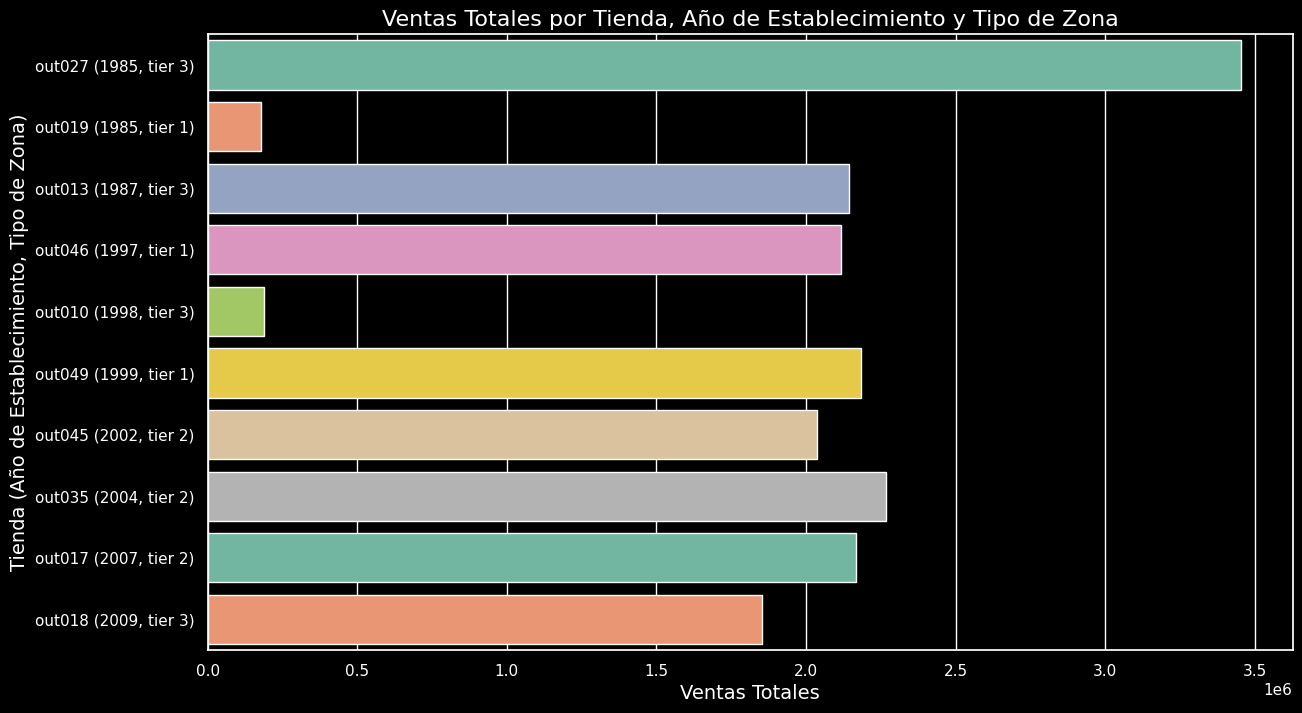

In [32]:
sns.set(style="whitegrid")
plt.style.use('dark_background')

sales_by_outlet_year_location = df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

sales_by_outlet_year_location = sales_by_outlet_year_location.reset_index()

sales_by_outlet_year_location = sales_by_outlet_year_location.sort_values(by=['Outlet_Establishment_Year', 'Item_Outlet_Sales'], ascending=[True, False])

plt.figure(figsize=(14, 8))
sns.barplot(
    x=sales_by_outlet_year_location['Item_Outlet_Sales'],
    y=sales_by_outlet_year_location['Outlet_Identifier'] + ' (' +
      sales_by_outlet_year_location['Outlet_Establishment_Year'].astype(str) + ', ' +
      sales_by_outlet_year_location['Outlet_Location_Type'] + ')',
    palette='Set2'
)
plt.title('Ventas Totales por Tienda, Año de Establecimiento y Tipo de Zona', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Tienda (Año de Establecimiento, Tipo de Zona)', fontsize=14)
plt.show()


**Observación:** La gráfica nos muestra las ventas totales respecto a ID de tienda, año de fundación y el tipo de zona donde se desempeña.


*   Se observa que **out027** que era la tienda más antigua, se encuentra en una zona con desarrollo bajo.
*   Se observa que **out045, out035 y out017**, son las tiendas más nuevas y todas se encuentran en zonas de desarrollo medio.


*   Se observa que **out019** es una tienda fundada en 1985 y que esta en una zona de desarrollo alta. Compartiendo rendimiento inferior con **out010**, siendo no tan antigua de una manera relativa y que por el contrario se encuentra en una zona de desarrollo bajo.





# **¡Antes de las conclusiones(insights) recordemos!** 🔴🔔

En un conjunto de datos se pueden analizar **un sinfín de cosas** y hacer aquello puede ser infeciente, ya que **el fin del análisis** debe ser ayudar a la parte interesada en **solucionar los problemas** que nos haya trasladado, en este caso:

*   Ayudar al minorista a comprender las propiedades de los productos.

*   Puntos de venta que juegan un papel crucial en el aumento de las ventas.


***Primero entendemos la problemática y luego análizamos, no a la inversa.***

# **Conclusiones:** 📋

**Respecto a propiedades de los productos:**

1.   **Preferencias del consumidor en productos bajos en grasa:** La mayoría de los productos vendidos **(64.7%)** son bajos en grasa, lo que sugiere una fuerte demanda por **productos saludables** en el mercado. Esto es una oportunidad para resaltar las propiedades de los productos bajos en grasa en el punto de venta y en la publicidad.
2.   **Categorías de productos más populares:** Las categorías "fruit and vegetables" y "snack foods" lideran las ventas, mientras que "seafood" y "breakfast" son las menos vendidas. Es importante comprender las razones detrás de la baja demanda en estas últimas categorías para mejorar su promoción.

**Respecto a puntos de venta:**

1.   **Distribución de ventas por zona:** Las tiendas en zonas de desarrollo bajo (Tier 3) obtienen mejores resultados en ventas que aquellas en zonas de desarrollo alto (Tier 1). Esto podría deberse a la relación precio-calidad, donde los clientes en zonas menos desarrolladas buscan productos más accesibles.
2.   **Tamaño de tienda y rendimiento de ventas:** Las tiendas de tamaño medio muestran el mejor rendimiento en ventas, mientras que las de mayor tamaño tienen un rendimiento inferior. Esto sugiere que un enfoque más personalizado y manejable en tiendas medianas podría ser clave para impulsar ventas.

3.   **Supermarket Type 1 lidera en ventas:** Los supermercados tipo 1, de tamaño intermedio, dominan en ventas, mientras que las "grocery stores" más pequeñas tienen un rendimiento bajo. Esto indica que la diversidad de productos en supermercados medianos es atractiva para los consumidores.
4.   **Tiendas más antiguas y rendimiento superior:** La tienda con mayor rendimiento, out027, es una de las más antiguas y se encuentra en una zona de desarrollo bajo, lo que refuerza la tendencia de mejores ventas en esas áreas.







# **¡Recomendaciones!** 💡

**Respecto a propiedades de los productos:**


1.   **Promoción de productos bajos en grasa:** Aprovecha el alto porcentaje de
productos bajos en grasa destacando sus beneficios en los puntos de venta, ya que resuenan bien con las preferencias de los consumidores. Crear campañas que destaquen las propiedades saludables de estos productos puede fortalecer su demanda.
2.   **Mejora del rendimiento en categorías con bajas ventas:** Las categorías como "seafood" y "breakfast" podrían beneficiarse de estrategias de marketing más agresivas, como descuentos, promociones cruzadas con otros productos más populares, o mejor visibilidad dentro de la tienda.

**Respecto a puntos de venta:**

1.   **Personalización en tiendas de tamaño medio:** Dado que las tiendas medianas son las que mejor rendimiento tienen, se recomienda implementar estrategias de marketing y productos específicos para este tamaño, aprovechando su flexibilidad para personalizar la oferta.

2.  **Potencial en zonas de desarrollo bajo:** Focaliza los esfuerzos de expansión o mejora en tiendas situadas en zonas de desarrollo bajo (Tier 3), donde hay mayor retorno en ventas. Adaptar la oferta de productos y precios a la realidad económica de estas zonas podría incrementar aún más el rendimiento.

3.   **Optimización en supermercados tipo 1:** Aumentar la gama de productos en los supermercados tipo 1 podría seguir incentivando las ventas. También es recomendable expandir o remodelar grocery stores pequeñas para convertirlas en supermercados más competitivos.

4.   **Reforzar el éxito de tiendas antiguas:** Implementar estrategias de fidelización para las tiendas más antiguas (como out027), que ya tienen una base de clientes fiel, podría seguir impulsando sus ventas. Además, analizar las estrategias usadas por estas tiendas puede ser útil para replicarlas en otras de menor rendimiento.


5.  **Enfoque en mejorar el rendimiento de tiendas en zonas de desarrollo alto:** Las tiendas en zonas de desarrollo alto están teniendo un rendimiento inferior; sería beneficioso identificar factores clave que pueden estar afectando su rendimiento, como precios altos o falta de productos relevantes para los consumidores de esas áreas.








# **¡Momento de riesgos! 🎯**

Cuento con **conocimientos básicos** de *Machine Learning*, así que aplicaré un modelo predictivo de regresión lineal para predecir ventas futuras, sea cual sea el resultado, lo dejaré para sentar un recuerdo de lo que fue mi primer uso de Machine Learning.

# Modelo Predictivo

Importaré las librerías necesarias para el modelo predictivo de regresión lineal.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Divido mis "features" con mi "target"**

In [35]:
X = df.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
             'Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)
y = df['Item_Outlet_Sales']

# **Preprocesamiento de los datos** ⚙️
Utilizaré **OrdinalEncoder** para entrenar y transdormar los datos categóricos ordinales, finalizando con un dataframe de estos datos transformados.

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['low fat','regular']])
ordinal_encoder.fit(df[['Item_Fat_Content']])
serie_encoded = ordinal_encoder.transform(df[['Item_Fat_Content']])
df_encoded = pd.DataFrame(serie_encoded, columns=['Item_Fat_Content_encoded'])

print("Datos originales", df['Item_Fat_Content'])
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder.categories_)

Datos originales 0       low fat
1       regular
2       low fat
3       regular
4       low fat
         ...   
8518    low fat
8519    regular
8520    low fat
8521    regular
8522    low fat
Name: Item_Fat_Content, Length: 8523, dtype: object
Serie codificada [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
Categorías [array(['low fat', 'regular'], dtype=object)]


In [37]:
ordinal_encoder2 = OrdinalEncoder(categories=[['small','medium','high']])
ordinal_encoder2.fit(df[['Outlet_Size']])
serie_encoded1 = ordinal_encoder2.transform(df[['Outlet_Size']])
df_encoded1 = pd.DataFrame(serie_encoded1, columns=['Outlet_Size_encoded'])

print("Datos originales", df['Outlet_Size'])
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder2.categories_)

Datos originales 0       medium
1       medium
2       medium
3       medium
4         high
         ...  
8518      high
8519    medium
8520     small
8521    medium
8522     small
Name: Outlet_Size, Length: 8523, dtype: object
Serie codificada [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
Categorías [array(['small', 'medium', 'high'], dtype=object)]


In [38]:
ordinal_encoder3 = OrdinalEncoder(categories=[['tier 3','tier 2','tier 1']])
ordinal_encoder3.fit(df[['Outlet_Location_Type']])
serie_encoded2 = ordinal_encoder3.transform(df[['Outlet_Location_Type']])
df_encoded2 = pd.DataFrame(serie_encoded2, columns=['Outlet_Location_Type'])

print("Datos originales", df['Outlet_Location_Type'])
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder3.categories_)

Datos originales 0       tier 1
1       tier 3
2       tier 1
3       tier 3
4       tier 3
         ...  
8518    tier 3
8519    tier 2
8520    tier 2
8521    tier 3
8522    tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object
Serie codificada [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
Categorías [array(['tier 3', 'tier 2', 'tier 1'], dtype=object)]


In [41]:
ordinal_encoder4 = OrdinalEncoder(categories=[['grocery store','supermarket type3','supermarket type2','supermarket type1']])
ordinal_encoder4.fit(df[['Outlet_Type']])
serie_encoded3 = ordinal_encoder4.transform(df[['Outlet_Type']])
df_encoded3 = pd.DataFrame(serie_encoded3, columns=['Outlet_Type_encoded'])

print("Datos originales", df['Outlet_Type'])
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder4.categories_)

Datos originales 0       supermarket type1
1       supermarket type2
2       supermarket type1
3           grocery store
4       supermarket type1
              ...        
8518    supermarket type1
8519    supermarket type1
8520    supermarket type1
8521    supermarket type2
8522    supermarket type1
Name: Outlet_Type, Length: 8523, dtype: object
Serie codificada [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
Categorías [array(['grocery store', 'supermarket type3', 'supermarket type2',
       'supermarket type1'], dtype=object)]


# **Ahora:**
Utilizaré **OneHotlEncoder **para entrenar y transdormar los datos categóricos nominales, finalizando con un dataframe de estos datos transformados.

In [43]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
serie_encoded4 = onehot_encoder.fit_transform(df[['Outlet_Establishment_Year']])
df_encoded4 = pd.DataFrame(serie_encoded4,
                           columns=onehot_encoder.get_feature_names_out(['Outlet_Establishment_Year']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
df_encoded4

,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
onehot_encoder1 = OneHotEncoder(sparse=False)
serie_encoded5 = onehot_encoder1.fit_transform(df[['Outlet_Identifier']])
df_encoded5 = pd.DataFrame(serie_encoded5,
                           columns=onehot_encoder1.get_feature_names_out(['Outlet_Identifier']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
df_encoded5

,Outlet_Identifier_out010,Outlet_Identifier_out013,Outlet_Identifier_out017,Outlet_Identifier_out018,Outlet_Identifier_out019,Outlet_Identifier_out027,Outlet_Identifier_out035,Outlet_Identifier_out045,Outlet_Identifier_out046,Outlet_Identifier_out049
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
onehot_encoder2 = OneHotEncoder(sparse=False)
serie_encoded6 = onehot_encoder2.fit_transform(df[['Item_Type']])
df_encoded6 = pd.DataFrame(serie_encoded6,
                           columns=onehot_encoder2.get_feature_names_out(['Item_Type']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
df_encoded6

,Item_Type_baking goods,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,Item_Type_dairy,Item_Type_frozen foods,Item_Type_fruits and vegetables,Item_Type_hard drinks,Item_Type_health and hygiene,Item_Type_household,Item_Type_meat,Item_Type_others,Item_Type_seafood,Item_Type_snack foods,Item_Type_soft drinks,Item_Type_starchy foods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **¡Bien!**
Utilizaré **StandardScaler** para entrenar y transdormar los datos numéricos, finalizando con un dataframe de estos datos transformados. Adicionalmente, generaré un gráfico para ver los datos escalados.

Media de los datos [2181.28891358]
Varianza de los datos [2911799.25823004]


(array([1.753e+03, 1.527e+03, 1.377e+03, 1.071e+03, 9.110e+02, 6.160e+02,
        4.400e+02, 2.890e+02, 2.260e+02, 1.330e+02, 8.300e+01, 4.100e+01,
        2.500e+01, 1.100e+01, 1.200e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([-1.25879017, -0.87629841, -0.49380666, -0.1113149 ,  0.27117685,
         0.65366861,  1.03616036,  1.41865212,  1.80114387,  2.18363563,
         2.56612738,  2.94861914,  3.33111089,  3.71360265,  4.0960944 ,
         4.47858616,  4.86107791,  5.24356967,  5.62606142,  6.00855318,
         6.39104493]),
 <BarContainer object of 20 artists>)

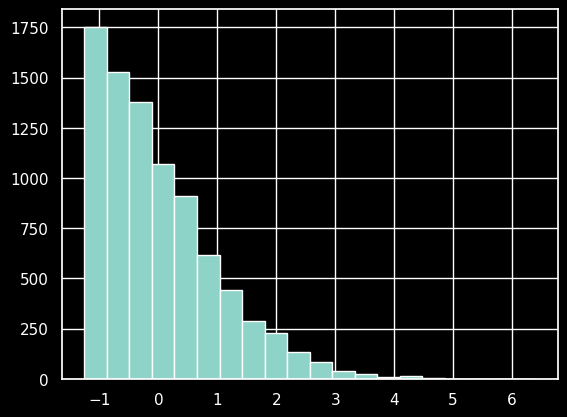

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Item_Outlet_Sales']])
print('Media de los datos', scaler.mean_)
print('Varianza de los datos', scaler.var_)
Outlet_sales_scaled = scaler.transform(df[['Item_Outlet_Sales']])
y_procesado = pd.DataFrame(Outlet_sales_scaled, columns=['Item_Outlet_Sales_scaled'])
import matplotlib.pyplot as plt
plt.hist(Outlet_sales_scaled, bins=20)

In [53]:
y_procesado

,Item_Outlet_Sales_scaled
0,0.910601
1,-1.018440
2,-0.049238
3,-0.849103
4,-0.695373
...,...
8518,0.349915
8519,-0.956402
8520,-0.579100
8521,-0.196725


**Realizo** una comparación mediante visualizaciones para ver la distribucioón de los datos reales con los escalados. 📊

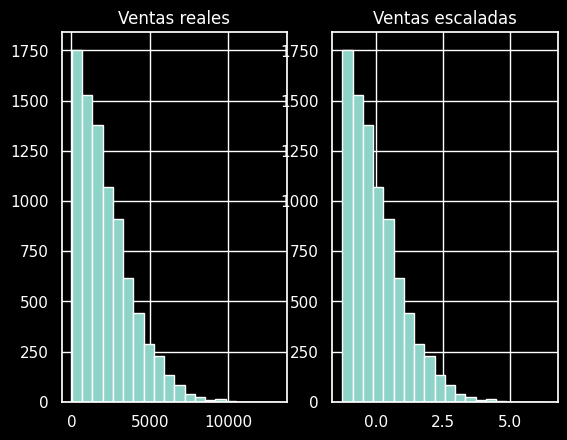

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.hist(df['Item_Outlet_Sales'], bins=20)
ax1.set_title('Ventas reales')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(Outlet_sales_scaled, bins=20)
ax2.set_title('Ventas escaladas')

plt.show()

# **¡Continuando!**
Uno todas mis variables que contienen mis features transformados en un solo dataframe, listos para entrenar y modelar.

In [55]:
X_procesado = pd.concat([df_encoded, df_encoded2, df_encoded1, df_encoded3, df_encoded4, df_encoded5, df_encoded6 ], axis=1)

In [56]:
X_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content_encoded         8523 non-null   float64
 1   Outlet_Location_Type             8523 non-null   float64
 2   Outlet_Size_encoded              8523 non-null   float64
 3   Outlet_Type_encoded              8523 non-null   float64
 4   Outlet_Establishment_Year_1985   8523 non-null   float64
 5   Outlet_Establishment_Year_1987   8523 non-null   float64
 6   Outlet_Establishment_Year_1997   8523 non-null   float64
 7   Outlet_Establishment_Year_1998   8523 non-null   float64
 8   Outlet_Establishment_Year_1999   8523 non-null   float64
 9   Outlet_Establishment_Year_2002   8523 non-null   float64
 10  Outlet_Establishment_Year_2004   8523 non-null   float64
 11  Outlet_Establishment_Year_2007   8523 non-null   float64
 12  Outlet_Establishment

In [57]:
y_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Outlet_Sales_scaled  8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [58]:
X_procesado.shape

(8523, 39)

In [59]:
y_procesado.shape

(8523, 1)

**Divido** mis datos con la correspondiente partición de validación

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y_procesado, test_size=0.3, random_state=42)
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content_encoded         5966 non-null   float64
 1   Outlet_Location_Type             5966 non-null   float64
 2   Outlet_Size_encoded              5966 non-null   float64
 3   Outlet_Type_encoded              5966 non-null   float64
 4   Outlet_Establishment_Year_1985   5966 non-null   float64
 5   Outlet_Establishment_Year_1987   5966 non-null   float64
 6   Outlet_Establishment_Year_1997   5966 non-null   float64
 7   Outlet_Establishment_Year_1998   5966 non-null   float64
 8   Outlet_Establishment_Year_1999   5966 non-null   float64
 9   Outlet_Establishment_Year_2002   5966 non-null   float64
 10  Outlet_Establishment_Year_2004   5966 non-null   float64
 11  Outlet_Establishment_Year_2007   5966 non-null   float64
 12  Outlet_Establishment_Y

**Inicio el modelaje de regresión lineal**

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

In [62]:
reg.predict(X_test).round()

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [-1.],
       [ 0.],
       [ 0.]])

In [63]:
y_test

,Item_Outlet_Sales_scaled
7503,-0.256812
2957,-1.069164
7031,-1.057068
1084,2.108058
856,0.102932
...,...
443,-0.028168
777,1.234449
1119,-0.828814
3209,-0.901777


**Revisó la métrica obtenida**

In [66]:
print(reg.score(X_test, y_test))

0.2674734454207889


# **¡Conclusiones!** 📝

El **r2** es una medida que indica qué tan bien mi modelo de regresión lineal explica la variabilidad en los datos. Mientras mas cercano a 1 el modelo se ha desempeñado bien, mientras más cercano a 0 el rendimiento ha sido no tan bueno. En este caso, el valor de 0.267 significa que el modelo ha tenido un rendimiento bajo.
Sin embargo, según mi análisis podría mejorar el modelo de las siguientes maneras:


*   Optimizar el modelo, como la limpieza y el preprocesamiento de los datos.
*   La creación de nuevas variables.

*   La exploración de modelos más complejos.

Para mi ha sido la primera vez que aplico Machine Learning, así que me siento emocionado de seguir aprendiendo más sobre esto, dejo este primer intento como un recuerdo para que en un futuro pueda ver lo que fue mi primer modelo predictivo y como mejoré mis habilidades en este increíble rubro de la tecnología.





# **¡Gracias!** 🚀